<a href="https://colab.research.google.com/github/mc-ivan/ml-grupo-3/blob/main/proyecto_final_grupo_3_ajustado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grupo 3
# Integrantes:
- Ivan Mamani
-

## Proceso de Transformacion del dataset

In [ ]:
# Importar librerias para Limpiar
from zipfile import ZipFile
import pandas as pd

In [ ]:
# Montar Dataset desde Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Descomprimir el archivo ZIP
zip_path = '/content/drive/MyDrive/MOD 8 - MACHINE LEARNING AND DEEP LEARNING/Homework/proyecto_final/dataset/GRUPO_3_1.zip'  # Ajusta el nombre real
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')  # Carpeta donde lo descomprime


In [ ]:
# Leer el CSV
csv_path = '/content/dataset/GRUPO 3_1.csv'
df = pd.read_csv(csv_path, sep='|')

# Verificar contenido
print(df.head())
print(df.shape)

      ALEAT         ID OBJ           V1         V2       V3          V4  \
0  0.000008    3032834  SI     0.000000   0.000000  0.00000    0.790010   
1  0.000024  330323800  NO     0.000000   0.000000  0.00000    0.000000   
2  0.000025  270961897  SI     0.000000   0.093916  0.00000  160.044629   
3  0.000044  264138040  NO     0.000000   0.180006  0.00000    0.428190   
4  0.000067    7663508  NO  5830.495244  13.598254  0.43192  671.426908   

            V5        V6        V7  ...     V22_P     V23_P     V24_P  \
0   226.635983  1.493656  0.000000  ...  0.000413  0.039569  0.168177   
1     0.236730  0.000000  0.000000  ...  0.000000  0.047265  0.039317   
2   748.575600  3.053709  0.000000  ...  0.000190  0.364742  0.167146   
3     3.973445  0.037748  0.000000  ...  0.000000  0.133315  0.004763   
4  1229.464863  4.764769  0.014773  ...  0.003644  0.008413  0.047617   

      V25_P  V26_P  V27_P     V28_P     V29_P    V30_P   V31_P.1  
0  0.000000    0.0    0.0  0.000000  0.2410

In [ ]:
# Guardar el archivo limpio en Colab
df.to_csv('/content/dataset/grupo_3_data.csv', index=False)

## Test

### 1. Importacion de Librerias

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

### 2. Carga del Dataset

In [3]:
file_path = '/content/dataset/grupo_3_data.csv'  # nuestro dataset standarizado
df = pd.read_csv(file_path)

### 3. Limpieza de Datos

In [5]:
# Eliminar columnas irrelevantes
columnas_a_eliminar = ['ALEAT', 'ID', 'VT', 'V31_P', 'V31_P.1']
df = df.drop(columns=[col for col in columnas_a_eliminar if col in df.columns])
df

,OBJ,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21_P,V22_P,V23_P,V24_P,V25_P,V26_P,V27_P,V28_P,V29_P,V30_P
0,SI,0.000000,0.000000,0.000000,0.790010,226.635983,1.493656,0.000000,0.0,21.376436,...,0.017770,0.000413,0.039569,0.168177,0.000000,0.0,0.000000,0.000000,0.241082,0.000000
1,NO,0.000000,0.000000,0.000000,0.000000,0.236730,0.000000,0.000000,0.0,0.000000,...,0.004889,0.000000,0.047265,0.039317,0.000000,0.0,0.000000,0.000000,0.833869,0.000000
2,SI,0.000000,0.093916,0.000000,160.044629,748.575600,3.053709,0.000000,0.0,710.699999,...,0.015393,0.000190,0.364742,0.167146,0.000336,0.0,0.000000,0.000000,0.166327,0.000000
3,NO,0.000000,0.180006,0.000000,0.428190,3.973445,0.037748,0.000000,0.0,9.537385,...,0.006996,0.000000,0.133315,0.004763,0.000000,0.0,0.000000,0.000000,0.630348,0.000000
4,NO,5830.495244,13.598254,0.431920,671.426908,1229.464863,4.764769,0.014773,0.0,105.787756,...,0.018675,0.003644,0.008413,0.047617,0.000000,0.0,0.000000,0.000443,0.541675,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NO,0.000000,0.862610,0.000000,1.221377,3.961294,0.294498,0.000000,0.0,4.321516,...,0.013672,0.000042,0.275578,0.018639,0.000013,0.0,0.000000,0.000000,0.600512,0.000000
9996,NO,0.000000,0.000078,0.000000,31.933053,2.707306,0.131512,0.000000,0.0,0.000000,...,0.007794,0.000000,0.350352,0.120958,0.000007,0.0,0.000000,0.000000,0.479524,0.000000
9997,NO,5279.915376,14.147220,0.029201,9341.422617,433.672074,4.372223,0.000000,0.0,760.560211,...,0.010847,0.000072,0.356307,0.026591,0.000234,0.0,0.000000,0.000000,0.185568,0.000011
9998,NO,15.196115,0.000000,0.000000,0.129189,4.017262,0.038905,0.000000,0.0,29.922552,...,0.003204,0.000000,0.135951,0.027216,0.000000,0.0,0.000000,0.000000,0.029994,0.000000


### 4. Definición de variables a utilizar

In [9]:
variables_originales = [f'V{i}' for i in range(1, 31)]
variables_relativas = [f'V{i}_P' for i in range(1, 31)]

# Para este ejercicio, se opta por usar las variables relativas (normalizadas)
X = df[variables_relativas]
y = df['OBJ'].map({'NO': 0, 'SI': 1})  # Conversión binaria

### Exploración previa

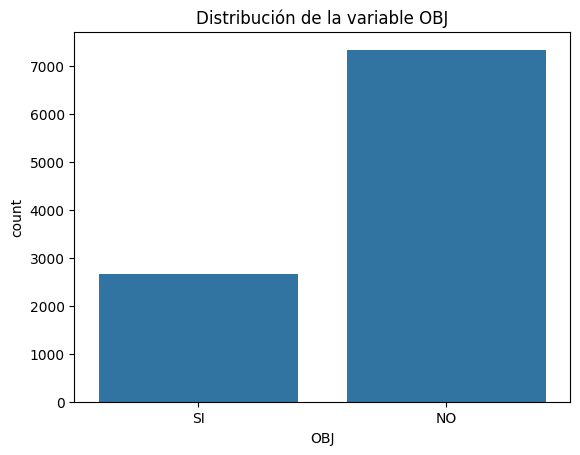

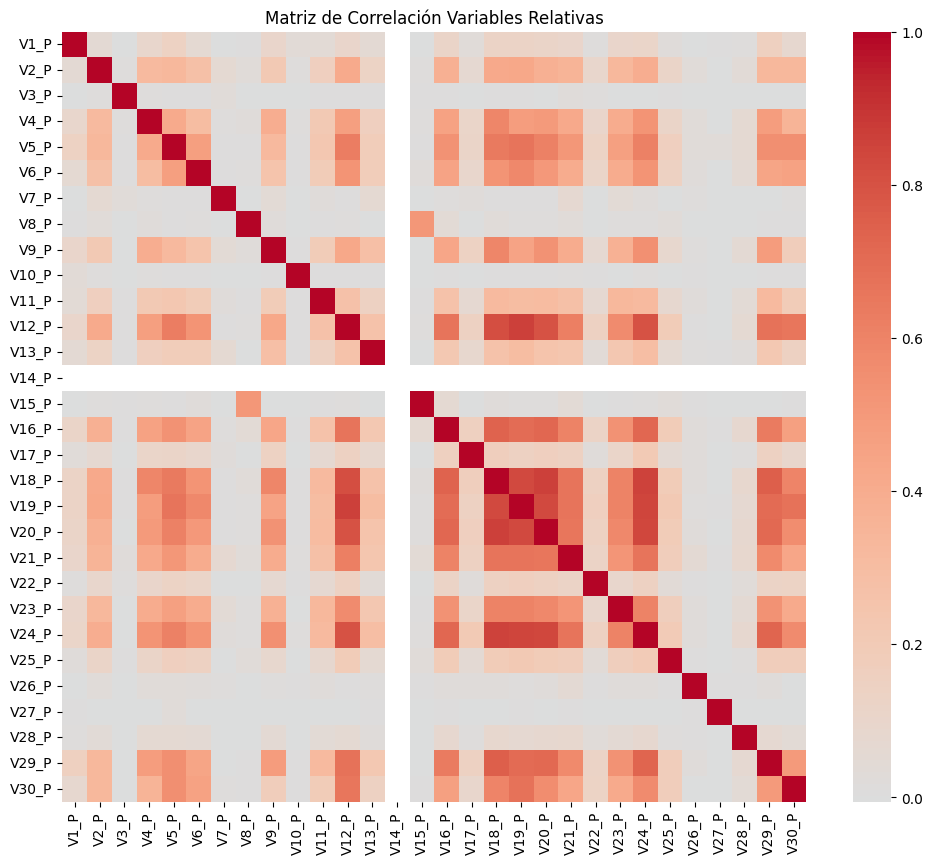

In [10]:
sns.countplot(x=y.map({0: 'NO', 1: 'SI'}))
plt.title('Distribución de la variable OBJ')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='coolwarm', center=0)
plt.title('Matriz de Correlación Variables Relativas')
plt.show()

### 5. División de datos y normalización

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Aplicar SMOTE y Oversampling

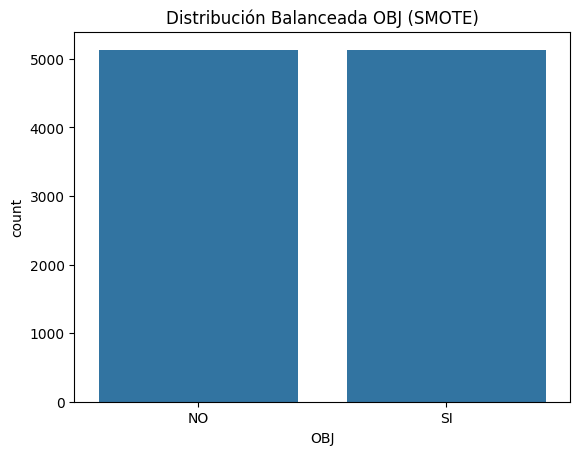

In [12]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

sns.countplot(x=y_train_balanced.map({0: 'NO', 1: 'SI'}))
plt.title('Distribución Balanceada OBJ (SMOTE)')
plt.show()

### 6. Definición de modelos y GridSearch (con pesos de clase)

In [13]:
# modelos = {
#     'LogisticRegression': {
#         'model': LogisticRegression(max_iter=5000),
#         'params': {'C': [0.01, 0.1, 1, 10]}
#     },
#     'RandomForest': {
#         'model': RandomForestClassifier(random_state=42),
#         'params': {'n_estimators': [100, 150], 'max_depth': [5, 10, None]}
#     },
#     'SVM_RBF': {
#         'model': SVC(kernel='rbf', probability=True),
#         'params': {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.001]}
#     }
# }

modelos = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=5000, class_weight='balanced'),
        'params': {'C': [0.01, 0.1, 1, 10]}
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42, class_weight='balanced'),
        'params': {'n_estimators': [100, 150], 'max_depth': [5, 10, None]}
    },
    'SVM_RBF': {
        'model': SVC(kernel='rbf', probability=True, class_weight='balanced'),
        'params': {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.001]}
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {'n_estimators': [100, 150], 'max_depth': [3, 5, 7], 'scale_pos_weight': [1, 2, 5]}
    }
}

resultados = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for nombre, m in modelos.items():
    grid = GridSearchCV(m['model'], m['params'], cv=cv, scoring='f1', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    resultados[nombre] = {
        'mejor_modelo': grid.best_estimator_,
        'mejores_parametros': grid.best_params_,
        'mejor_score_cv': grid.best_score_
    }

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:40:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### 7. Evaluación final


Modelo: LogisticRegression
Mejores parámetros: {'C': 0.1}
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      2201
           1       0.34      0.39      0.36       799

    accuracy                           0.64      3000
   macro avg       0.56      0.56      0.56      3000
weighted avg       0.65      0.64      0.65      3000

AUC: 0.5823098386840888


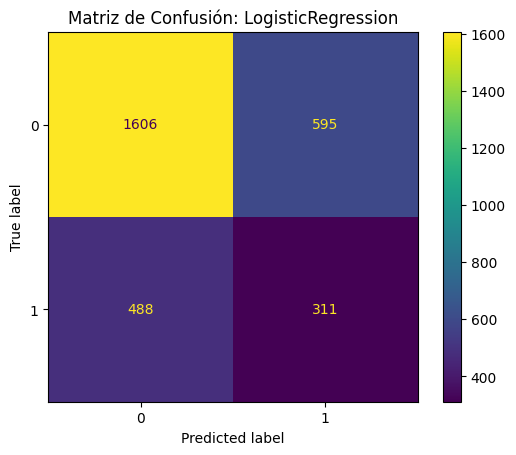

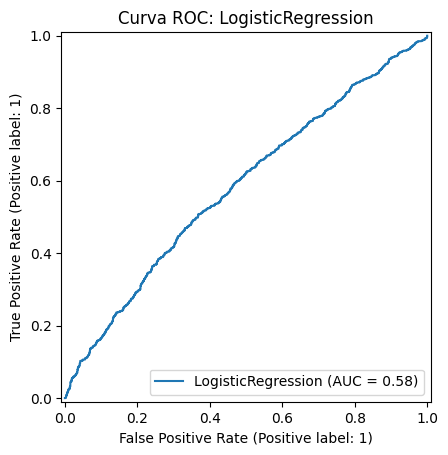


Modelo: RandomForest
Mejores parámetros: {'max_depth': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.79      0.65      0.71      2201
           1       0.35      0.51      0.41       799

    accuracy                           0.61      3000
   macro avg       0.57      0.58      0.56      3000
weighted avg       0.67      0.61      0.63      3000

AUC: 0.6015251344962667


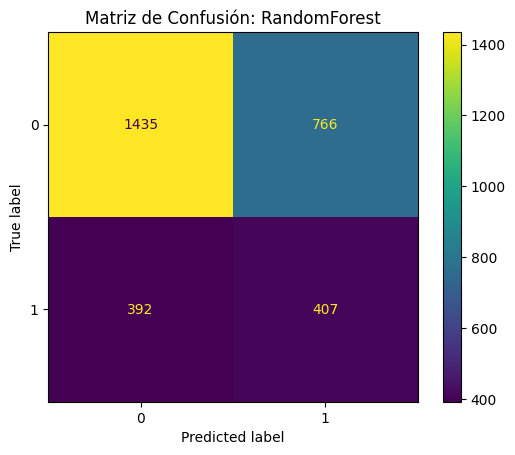

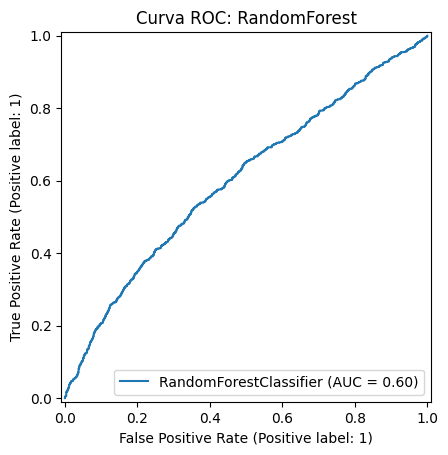


Modelo: SVM_RBF
Mejores parámetros: {'C': 10, 'gamma': 'scale'}
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      2201
           1       0.33      0.34      0.33       799

    accuracy                           0.64      3000
   macro avg       0.54      0.54      0.54      3000
weighted avg       0.64      0.64      0.64      3000

AUC: 0.566133894082733


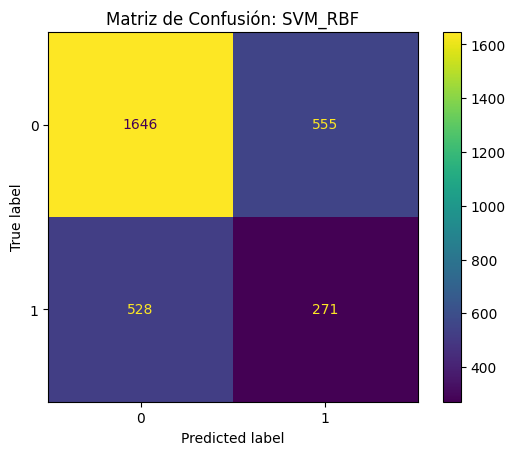

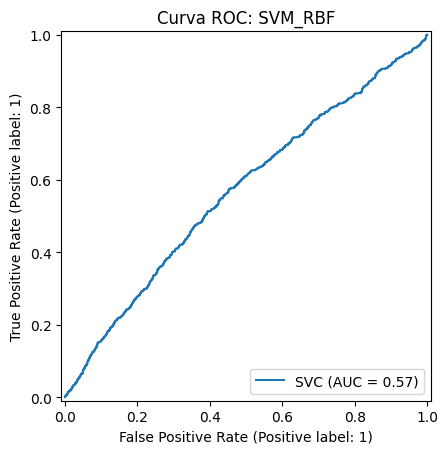


Modelo: XGBoost
Mejores parámetros: {'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 5}
              precision    recall  f1-score   support

           0       0.77      0.36      0.49      2201
           1       0.29      0.71      0.41       799

    accuracy                           0.45      3000
   macro avg       0.53      0.53      0.45      3000
weighted avg       0.64      0.45      0.47      3000

AUC: 0.5726049542846322


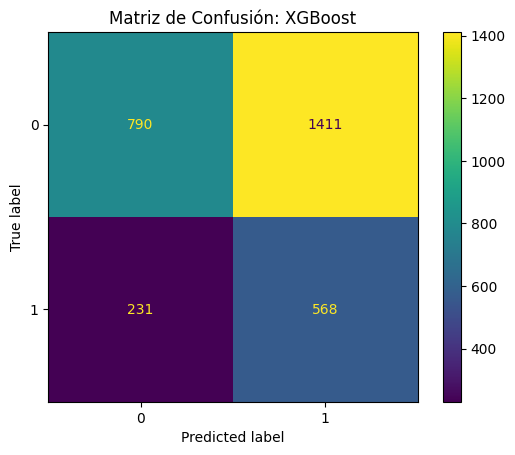

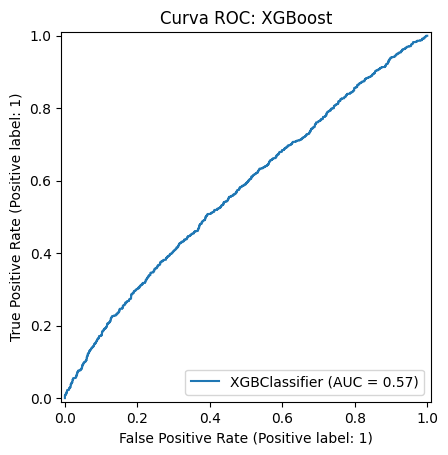

In [18]:
for nombre, resultado in resultados.items():
    y_pred = resultado['mejor_modelo'].predict(X_test_scaled)
    print(f"\nModelo: {nombre}")
    print(f"Mejores parámetros: {resultado['mejores_parametros']}")
    print(classification_report(y_test, y_pred))
    print(f"AUC: {roc_auc_score(y_test, resultado['mejor_modelo'].predict_proba(X_test_scaled)[:,1])}")

    ConfusionMatrixDisplay.from_estimator(resultado['mejor_modelo'], X_test_scaled, y_test)
    plt.title(f'Matriz de Confusión: {nombre}')
    plt.show()
    RocCurveDisplay.from_estimator(resultado['mejor_modelo'], X_test_scaled, y_test)
    plt.title(f'Curva ROC: {nombre}')
    plt.show()

### 8. Conclusión